# Analysing the evolution of the crime in Boston

Through this project, we will analyse the evolution of crime in Boston between 2015 and 2018 and try to find :
 - How crimes evolved through the years.
 - What types of crimes are most common over the years.
 - Where are the most dangerous districts and streets through the years.
 - Which day crimes are the most frequent over the years.
 
      

## Exploring and cleaning the data

In [1]:
# read in the data
import pandas as pd
Crime_Boston = pd.read_csv('CrimeBoston.csv')

In [2]:
# quick exploration og the data
Crime_Boston.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [3]:
Crime_Boston.shape

(319073, 17)

We are going to delete some useless columns and raws

In [4]:
# We drop these 4 columns which are useless for our analysis
Crime_Boston.drop(["SHOOTING", "Lat", "Long", "Location"], axis=1, inplace=True)

In [5]:
# We now verify that the data is clean enough to be used properly
Crime_Boston.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1765
REPORTING_AREA             0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  90
STREET                 10871
dtype: int64

In [6]:
# We delete rows with missing values for the "STREET" column
Crime_Boston.dropna(subset=["STREET"], inplace=True)

In [7]:
Crime_Boston.shape

(308202, 13)

## Finding how the number of crimes evolved through years in Boston

The total of crimes reported for Boston in 2015 was equal to 52106
The total of crimes reported for Boston in 2016 was equal to 93399
The total of crimes reported for Boston in 2017 was equal to 98155
The total of crimes reported for Boston in 2018 was equal to 64542


Text(0, 0.5, 'Total crimes')

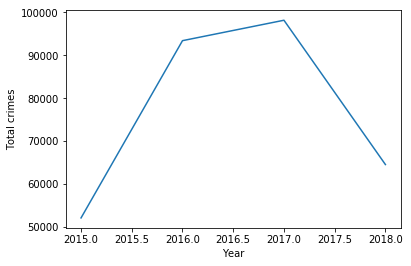

In [13]:
import matplotlib.pyplot as plt
for i in range(2015, 2019):
    total_crime = Crime_Boston["OFFENSE_CODE_GROUP"][Crime_Boston["YEAR"] == i].value_counts().sum()
    print("The total of crimes reported for Boston in " + str(i) + " was equal to " + str(total_crime))

number_crimes = [52106, 93399, 98155, 64542]
year = [2015, 2016, 2017, 2018]
plt.plot(year, number_crimes)
plt.xlabel("Year")
plt.ylabel("Total crimes")

We can see that the number of crimes reported had increased significantly between 2015 and 2017 and then decreased.
We can't say why but there were a sudden increase between 2015 and 2016, and a sudden decrease between 2017 and 2018 of the total number of crimes.

## Finding most common type of crimes through years in Boston

In [9]:
for i in range(2015, 2019):
    md_district = Crime_Boston["OFFENSE_CODE_GROUP"][Crime_Boston["YEAR"] == i]
    print(i)
    print(md_district.describe())
    print("\n")

2015
count                               52106
unique                                 62
top       Motor Vehicle Accident Response
freq                                 5428
Name: OFFENSE_CODE_GROUP, dtype: object


2016
count                               93399
unique                                 65
top       Motor Vehicle Accident Response
freq                                 9679
Name: OFFENSE_CODE_GROUP, dtype: object


2017
count                               98155
unique                                 66
top       Motor Vehicle Accident Response
freq                                11234
Name: OFFENSE_CODE_GROUP, dtype: object


2018
count                               64542
unique                                 60
top       Motor Vehicle Accident Response
freq                                 7410
Name: OFFENSE_CODE_GROUP, dtype: object




Between 2015 and 2018 the most common type of crimes in Boston had always been "Motor Vehicle Accident Response"

## Finding the most dangerous district and streets in Boston through years

In [10]:
# Finding the most dangerous districts in Boston through years.
for i in range(2015, 2019):
    md_district = Crime_Boston["DISTRICT"][Crime_Boston["YEAR"] == i]
    print(i)
    print(md_district.describe())
    print("\n")

2015
count     52027
unique       12
top          B2
freq       8357
Name: DISTRICT, dtype: object


2016
count     93173
unique       12
top          B2
freq      14726
Name: DISTRICT, dtype: object


2017
count     97961
unique       12
top          B2
freq      15305
Name: DISTRICT, dtype: object


2018
count     64323
unique       12
top          B2
freq       9744
Name: DISTRICT, dtype: object




It seems that the most dangerous district between 2015 and 2018 had always been the B2 one.

In [11]:
# finding most dangerous streets in Boston through years.
for i in range(2015, 2019):
    md_street = Crime_Boston["STREET"][Crime_Boston["YEAR"] == i]
    print(i)
    print(md_street.describe())
    print("\n")

2015
count             52106
unique             3140
top       WASHINGTON ST
freq               2505
Name: STREET, dtype: object


2016
count             93399
unique             3601
top       WASHINGTON ST
freq               4212
Name: STREET, dtype: object


2017
count             98155
unique             3630
top       WASHINGTON ST
freq               4440
Name: STREET, dtype: object


2018
count             64542
unique             3282
top       WASHINGTON ST
freq               3037
Name: STREET, dtype: object




So between 2015 and 2018, it seems that the most dangerous street had always been "Washington ST"

## Finding the day when crimes are the most committed

In [12]:
for i in range(2015, 2019):
    md_street = Crime_Boston["DAY_OF_WEEK"][Crime_Boston["YEAR"] == i]
    print(i)
    print(md_street.describe())
    print("\n")

2015
count      52106
unique         7
top       Friday
freq        7827
Name: DAY_OF_WEEK, dtype: object


2016
count      93399
unique         7
top       Friday
freq       14185
Name: DAY_OF_WEEK, dtype: object


2017
count      98155
unique         7
top       Friday
freq       15045
Name: DAY_OF_WEEK, dtype: object


2018
count      64542
unique         7
top       Friday
freq        9795
Name: DAY_OF_WEEK, dtype: object




The data show that most of the crimes were commited on Friday

Finally, through this project, we analysed the evolution of the crime in Boston between 2015 and 2018
We found that :
- the total number of crimes has increased and then decreased 
- the most committed type of crimes was "Motor Vehicle Accident Response"
- the most dangerous district was the district "B2" and the most dangerous street was Washington ST
- the day when crimes were the most committed was Friday  